In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/PJ/csv/tipos/Kiwi.csv')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cliente         8465 non-null   object 
 1   precio_venta    8380 non-null   float64
 2   peso            8465 non-null   float64
 3   t_id            8465 non-null   object 
 4   fecha_venta     8440 non-null   object 
 5   hora_venta      8440 non-null   object 
 6   tipo            8465 non-null   object 
 7   fecha_recogida  8465 non-null   object 
 8   hora_recogida   8465 non-null   object 
 9   lote            8465 non-null   object 
 10  marca           8465 non-null   object 
 11  coste_inicial   8237 non-null   float64
 12  proveedor       8465 non-null   object 
dtypes: float64(3), object(10)
memory usage: 859.9+ KB


In [ ]:
print(df.describe())

       precio_venta         peso  coste_inicial
count   8380.000000  8465.000000    8237.000000
mean       3.509850   299.848081       2.003933
std        0.719014   100.357650       0.506083
min        0.317017   -99.926334       0.100438
25%        3.017000   231.917081       1.661325
50%        3.509809   300.360971       2.006313
75%        3.996566   366.562407       2.351028
max        6.308673   654.597889       3.873204


In [ ]:
print(df.head())

         cliente  precio_venta        peso              t_id fecha_venta  \
0  CompraMaestra      4.548108  280.149726  Kiwi A001010.png  2022/09/17   
1  CompraMaestra      4.153318  426.856743  Kiwi A001011.png  2022/09/16   
2  CompraMaestra      3.590313  274.373889  Kiwi A001023.png  2022/09/05   
3  CompraMaestra      2.630247  286.127733  Kiwi A001092.png  2022/09/23   
4  CompraMaestra      2.842379  408.561999  Kiwi A001169.png  2022/09/16   

  hora_venta  tipo fecha_recogida hora_recogida                    lote  \
0      04:00  Kiwi     2022/09/16         19:00  Q73G73G48L49L49L46V78M   
1      14:00  Kiwi     2022/09/16         06:00  Q73G73G48L49L49M46V78M   
2      11:00  Kiwi     2022/09/05         02:00  Q73G73G48L49L50O46V78M   
3      03:00  Kiwi     2022/09/22         21:00  Q73G73G48L49L57N46V78M   
4      01:00  Kiwi     2022/09/15         13:00  Q73G73G48L49M54U46V78M   

                 marca  coste_inicial                           proveedor  
0  FrescuraInigu

In [ ]:
df['coste_inicial'] = df['coste_inicial'].round(2)
df['peso'] = df['peso'].round(2)
df['precio_venta'] = df['precio_venta'].round(2)

df.head()

# **PESO**

Empezamos analizando los PESOS

In [ ]:
peso_minimo = df["peso"].min()
peso_maximo = df["peso"].max()
negativos = df[df["peso"] < 0]
nulos = df[df["peso"].isnull()]

print(f"Peso mínimo: {peso_minimo}")
print(f"Peso máximo: {peso_maximo}")
print(f"Total negativos: {len(negativos)}")
print(f"Total nulos: {len(nulos)}")

Peso mínimo: -99.92633427880924
Peso máximo: 654.5978894673308
Total negativos: 15
Total nulos: 0


In [ ]:
df[df["peso"] < 0]["marca"].value_counts()


,count
marca,
GourmetFrutas,3
CosechaDivina,2
MaravillaJugosa,2
ManjarFruity,2
JugosoAroma,1
EmbrujoFrutal,1
FrutaDulce,1
DeliciosoEdén,1
DulceEncanto,1


In [ ]:
df[df["peso"] < 0]["proveedor"].value_counts()

,count
proveedor,
Agronutrientes del Futuro,3
Fertilizantes Naturales del Valle,2
Semillero Genético BioCampo,1
Maquinaria Agrícola Avanzada,1
Herramientas Agroindustriales Gómez,1
Fitosanitarios BioPro,1
Silos y Almacenes AgroVault,1
Agricultura Inteligente TechCultivos,1
Insecticidas Ecológicos Reyes,1


In [ ]:
df[df["peso"] < 0]["lote"].unique()

array(['Q73G73L48N56M51J80T71', 'Q73G73G48L49P53O46V78M',
       'Q73G73G48L53S50J80T71', 'Q73G73G48L54L51J80T71',
       'Q73G73L48M51N49J80T71', 'Q73G73G48L49R57O46V78M',
       'Q73G73I48L49M57J80T71', 'Q73G73G48L57U46V78M',
       'Q73G73L48O55N48J80T71', 'Q73G73L48R54L46V78M',
       'Q73G73H48L51S51J80T71', 'Q73G73H48L57L50J80T71',
       'Q73G73G48L49P52S46V78M', 'Q73G73I48L49T54J80T71',
       'Q73G73L48N50S46V78M'], dtype=object)

Revisamos si es una marca o proveedor en específico que tiene negativos pero resultan ser los lotes Q73G73.

In [ ]:
print(negativos["peso"])

719    -46.356435
1064    -5.587641
1107   -54.747303
1110   -28.819081
1184   -17.753903
1858   -28.380560
4382    -3.560711
5834   -15.589585
5967   -99.926334
6216   -23.304431
6531   -97.446956
6826    -7.642644
7259   -18.878546
7602    -2.301954
8387   -43.091861
Name: peso, dtype: float64


Para la poca cantidad que son los eliminamos, no tienen sentido tampoco en positivo.

In [ ]:
filas_peso_negativo = df[df["peso"] < 0]
print(filas_peso_negativo)

                      cliente  precio_venta       peso              t_id  \
719   Supermercados del Valle      3.481150 -46.356435    Kiwi002813.png   
1064           SuperEconómico      3.741640  -5.587641  Kiwi A001453.png   
1107           SuperEconómico      2.089795 -54.747303   Kiwi A00572.png   
1110           SuperEconómico      3.468982 -28.819081   Kiwi A00603.png   
1184           SuperEconómico      2.807979 -17.753903    Kiwi001321.png   
1858       Mercado del Barrio      2.285822 -28.380560  Kiwi A001693.png   
4382       SuperMercado Ideal      3.217340  -3.560711   Kiwi C00119.png   
5834    Distribuidora Gourmet      3.802682 -15.589585    Kiwi A0099.png   
5967    Distribuidora Gourmet      3.933498 -99.926334    Kiwi003720.png   
6216   Distribuidora Nacional      2.396435 -23.304431     Kiwi00660.png   
6531         La Canasta Feliz      3.477939 -97.446956   Kiwi B00373.png   
6826            MaxiAlimentos      3.274575  -7.642644   Kiwi B00902.png   
7259        

Reemplazamos todos los valores negativos por NaN


In [ ]:
df["peso"] = df["peso"].mask(df["peso"] < 0)

In [ ]:
print("Cantidad de pesos mayores de 450 g:", len(df[df['peso'] > 450]))
print("Peso máximo:", df.loc[df['peso'] > 450, 'peso'].max())

Cantidad de pesos mayores de 450 g: 580
Peso máximo: 654.5978894673308


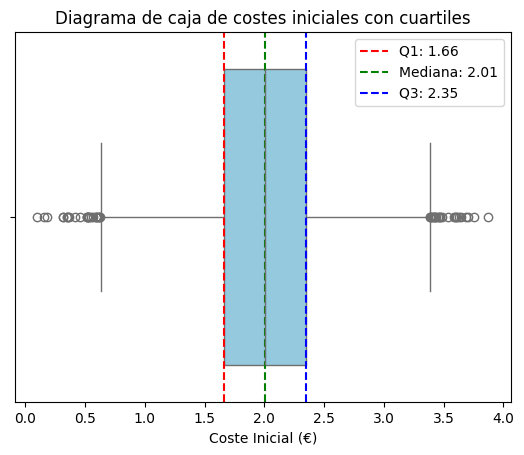

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["coste_inicial"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de costes iniciales con cuartiles')
plt.xlabel('Coste Inicial (€)')
plt.legend()

plt.show()

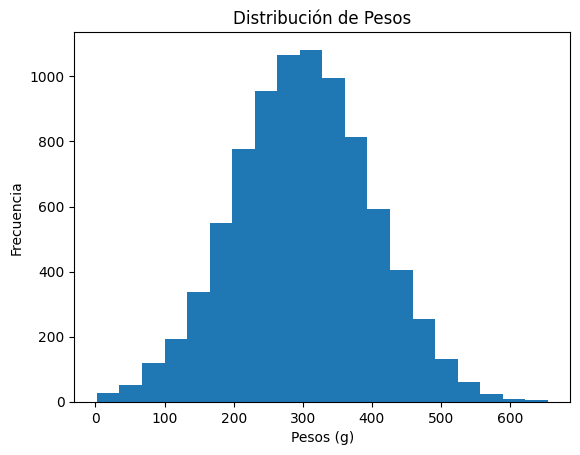

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["peso"].dropna(), bins=20)
plt.title('Distribución de Pesos')
plt.xlabel('Pesos (g)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_pe = df["peso"].quantile(0.25)
Q3_pe = df["peso"].quantile(0.75)
IQR_pe = Q3_pe - Q1_pe
outliers_pe = df[df["peso"] > Q3_pe + 1.5 * IQR_pe]

print("Total outliers:", outliers_pe["peso"].count())
print(Q1_pe)
print(Q3_pe)
print(IQR_pe)

Total outliers: 32
232.34889141877483
366.6600077654415
134.31111634666667


In [ ]:
print(df[['peso', 't_id']].dropna(subset=['peso']).sort_values(by='peso'))

            peso              t_id
3376    2.126182    Kiwi A0081.png
1843    3.220476  Kiwi A001301.png
1144    3.452126   Kiwi B00586.png
1890    4.328382   Kiwi A00527.png
3529    5.055033    Kiwi004139.png
...          ...               ...
4492  611.675231     Kiwi00297.png
2784  625.865969    Kiwi003093.png
2391  639.013515   Kiwi A00307.png
7663  644.969870    Kiwi001636.png
1296  654.597889     Kiwi00563.png

[8450 rows x 2 columns]


Teniendo en cuenta que el peso medio de un kiwi ronda entre 70 y 120 gramos. Revisemos los pesos.

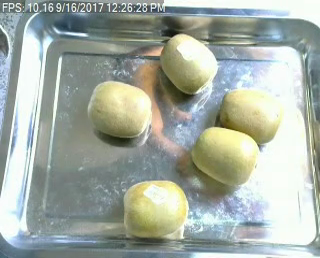

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Kiwi/kiwi A/Kiwi A0081.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

En la imagen del peso minimo podemos encontrar 5 kiwis con un peso de 2.12 gr.

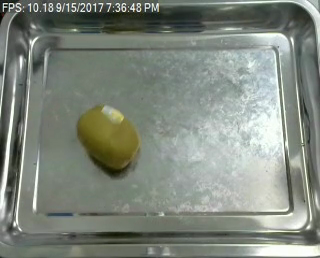

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Kiwi/Total Number of Kiwi fruit/Kiwi001636.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

En esta imagen en cambio podemos ver el segundo peso máximo con un peso de 644.969870 y tan solo un Kiwi.

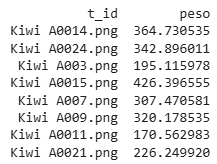

En todas las imagenes de la tabla anterior aparece un solo Kiwi.

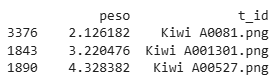

Mientras que en las imagenes de la tabla anterior aparecen varios kiwis y los pesos son imposibles incluso para 1 solo kiwi.


Dejo los pesos aquí y veremos más adelante. Empiezo con coste inicial.


# **COSTE INICIAL**

In [ ]:
coste_inicial_min = df["coste_inicial"].min()
coste_inicial_max = df["coste_inicial"].max()
negativos_coste = df[df["coste_inicial"] < 0]
nulos_coste = df[df["coste_inicial"].isnull()]

print(f"Coste inicial mínimo: {coste_inicial_min}")
print(f"Coste inicial máximo: {coste_inicial_max}")
print(f"Coste inicial negativos: {len(negativos_coste)}")
print(f"Coste inicial nulos: {len(nulos_coste)}")

Coste inicial mínimo: 0.1004382093627602
Coste inicial máximo: 3.87320422743008
Coste inicial negativos: 0
Coste inicial nulos: 228


No encontramos negativos y los costes iniciales van desde los 0.10 hasta los 3.87


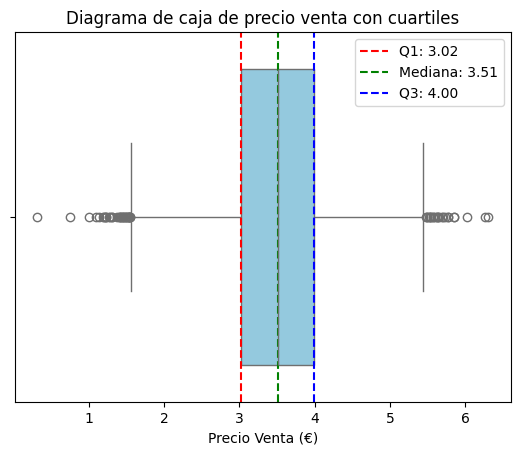

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

En el gráfico se ven muchos outliers. Vamos a ver en otro gráfico como visualizamos los datos.

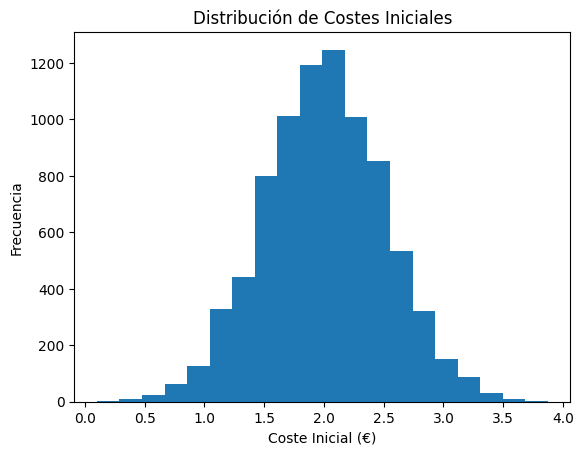

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["coste_inicial"].dropna(), bins=20)
plt.title('Distribución de Costes Iniciales')
plt.xlabel('Coste Inicial (€)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_ci = df["coste_inicial"].quantile(0.25)
Q3_ci = df["coste_inicial"].quantile(0.75)
IQR_ci = Q3_ci - Q1_ci
outliers_ci = df[df["coste_inicial"] > Q3_ci + 1.5 * IQR_ci]

print("Total outliers:", outliers_ci["coste_inicial"].count())
print(Q1_ci)
print(Q3_ci)
print(IQR_ci)

Total outliers: 25
1.6613246185430874
2.3510277801944297
0.6897031616513423


Una vez analizados los costes iniciales y viendo que tenemos 25 outliers y el resto de costes se mueven en la media deben de ser excepciones por algún motivo de calidad, tamaño o imperfecciones de la fruta.

Pasamos a analizar los precios de venta:

# **PRECIO VENTA**

In [ ]:
peso_minimo_pv = df["precio_venta"].min()
peso_maximo_pv = df["precio_venta"].max()
negativos_pv = df[df["precio_venta"] < 0]
nulos_pv = df[df["precio_venta"].isnull()]

print(f"Precio venta mínimo: {peso_minimo_pv}")
print(f"Precio venta máximo: {peso_maximo_pv}")
print(f"Total negativos: {len(negativos_pv)}")
print(f"Total nulos: {len(nulos_pv)}")

Precio venta mínimo: 0.3170165835316845
Precio venta máximo: 6.308672557309022
Total negativos: 0
Total nulos: 85


Sabemos que las frutas que no tienen datos de venta es fruta que no ha podido ser vendida porque ha sido dañada durante la distribución. Vamos a comprobar si tienen fecha de venta.

In [ ]:
display(nulos_pv[nulos_pv["fecha_venta"].isnull()])

,cliente,precio_venta,peso,t_id,fecha_venta,hora_venta,tipo,fecha_recogida,hora_recogida,lote,marca,coste_inicial,proveedor


Ninguno nulos es un producto dañado y que, por lo tanto, no ha sido vendido. La empresa ha sufrido una perdida de información o esta información no ha sido registrada correctamente.

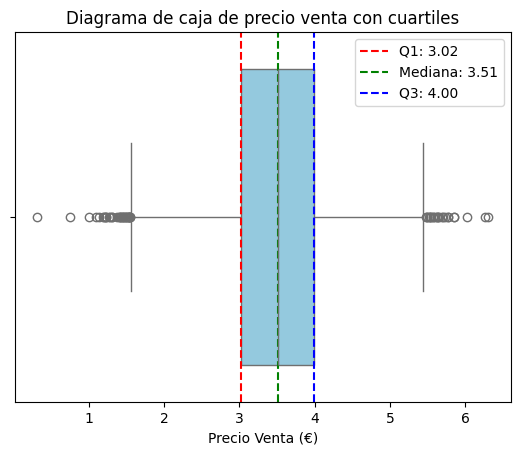

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

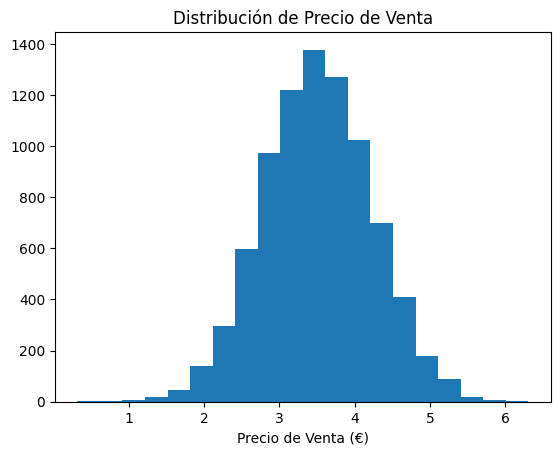

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["precio_venta"].dropna(), bins=20)
plt.title('Distribución de Precio de Venta')
plt.xlabel('Precio de Venta (€)')
plt.ylabel('')
plt.show()

In [ ]:
Q1_pv = df["precio_venta"].quantile(0.25)
Q3_pv = df["precio_venta"].quantile(0.75)
IQR_pv = Q3_pv - Q1_pv
outliers_pv = df[df["precio_venta"] > Q3_pv + 1.5 * IQR_pv]

print("Total outliers:", outliers_pv["precio_venta"].count())
print(Q1_pv)
print(Q3_pv)
print(IQR_pv)

Total outliers: 24
3.0170002979939055
3.9965659203988904
0.9795656224049849


En precio venta tenemos 24 outliers mientras que en coste inicial teníamos 25.

In [ ]:
outliers_pv_ci = pd.merge(outliers_ci, outliers_pv, on='t_id', how='inner')
outliers_pv_ci

,cliente_x,precio_venta_x,peso_x,t_id,fecha_venta_x,hora_venta_x,tipo_x,fecha_recogida_x,hora_recogida_x,lote_x,...,peso_y,fecha_venta_y,hora_venta_y,tipo_y,fecha_recogida_y,hora_recogida_y,lote_y,marca_y,coste_inicial_y,proveedor_y
0,La Tienda Justa,5.493353,502.302538,Kiwi003624.png,2022/09/12,07:00,Kiwi,2022/09/12,03:00,Q73G73L48O54N52J80T71,...,502.302538,2022/09/12,07:00,Kiwi,2022/09/12,03:00,Q73G73L48O54N52J80T71,SinfoníaDelicias,3.538195,BioCosecha Orgánica
1,EcoMercado Sostenible,5.848000,203.106580,Kiwi002744.png,2022/09/01,06:00,Kiwi,2022/09/07,20:00,Q73G73L48N55P52J80T71,...,203.106580,2022/09/01,06:00,Kiwi,2022/09/07,20:00,Q73G73L48N55P52J80T71,ExquisitoJardín,3.586352,Reforestación Ecológica VerdeVida
2,EcoTienda,5.776044,261.816526,Kiwi00614.png,2022/09/12,13:00,Kiwi,2022/09/12,07:00,Q73G73L48R49P46V78M,...,261.816526,2022/09/12,13:00,Kiwi,2022/09/12,07:00,Q73G73L48R49P46V78M,ParaísoFrutal,3.873204,Cultivos Hidropónicos Innovagro
3,SuperMercado Ideal,5.491905,354.740479,Kiwi A002133.png,2022/09/17,06:00,Kiwi,2022/09/17,05:00,Q73G73G48L50M51O46V78M,...,354.740479,2022/09/17,06:00,Kiwi,2022/09/17,05:00,Q73G73G48L50M51O46V78M,MaravillaJugosa,3.614578,Semillero Genético BioCampo
4,SuperMercado Ideal,6.271182,341.522432,Kiwi001086.png,2022/09/15,16:00,Kiwi,2022/09/15,06:00,Q73G73L48M48T54J80T71,...,341.522432,2022/09/15,16:00,Kiwi,2022/09/15,06:00,Q73G73L48M48T54J80T71,JugosoAroma,3.460036,Maquinaria Agrícola Avanzada
5,MegaCompra,5.570207,374.608780,Kiwi B00112.png,2022/09/27,13:00,Kiwi,2022/09/27,00:00,Q73G73H48L49M50J80T71,...,374.608780,2022/09/27,13:00,Kiwi,2022/09/27,00:00,Q73G73H48L49M50J80T71,EncantoNativo,3.752203,EcoRiego Soluciones
6,Delicias del Campo,5.542549,319.998990,Kiwi C00281.png,2022/09/03,06:00,Kiwi,2022/09/02,20:00,Q73G73I48L50T49J80T71,...,319.998990,2022/09/03,06:00,Kiwi,2022/09/02,20:00,Q73G73I48L50T49J80T71,SinfoníaDelicias,3.388076,BioCosecha Orgánica


7 coinciden.

Vamos a comprobar la norma que tenemos que cumplir que desde día de recogida hasta fecha venta tiene que pasar al menos un día.

In [ ]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], errors='coerce')
df['fecha_recogida'] = pd.to_datetime(df['fecha_recogida'], errors='coerce')

tiempo_diferencia = df['fecha_venta'] - df['fecha_recogida']

al_menos_un_dia = (tiempo_diferencia >= pd.Timedelta(days=1)).all()

print(f"Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? {al_menos_un_dia}")

Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? False


In [ ]:
tiempo_diferencia.min()

Timedelta('-29 days +00:00:00')

In [ ]:
tiempo_diferencia.sort_values()

,0
1138,-29 days
4956,-29 days
3133,-28 days
5579,-27 days
7787,-26 days
...,...
7185,NaT
7836,NaT
8080,NaT
8252,NaT


Nos encontramos con datos negativos.
Sabemos que no se pueden realizar reservas antes de la recogida por lo que es un error y la norma no se cumple.

**No en todos los productos pasan 24 horas mínimo desde la recogida hasta la venta.**

El peso está en gramos. Vamos a comprobar si a cada proveedor no se le venden más de 100Kg de fruta en un solo día.

In [ ]:
venta_dia = df.groupby(['proveedor', 'fecha_venta'])['peso'].sum()

mayor_100kg = (venta_dia > 100000).any()

print(f"¿Algún proveedor recibe más de 100 kg en un solo día? {mayor_100kg}")

¿Algún proveedor recibe más de 100 kg en un solo día? False


No se le vende más de 100Kg de kiwis a un proveedor en un solo día.

**En el caso de los Kiwi esta norma se cumple.**

Vamos a comprobar que 1 lote solo contiene un tipo de fruta y de una sola marca.

In [ ]:
lote_check = df.groupby('lote').agg({
    'tipo': 'nunique',
    'marca': 'nunique'
}).reset_index()

tipo_check = lote_check[lote_check['tipo'] > 1]
marca_check = lote_check[lote_check['marca'] > 1]

if tipo_check.empty and marca_check.empty:
    print("Cada lote solo contiene un tipo de fruta o una marca.")
else:
    print("Norma incumplida:")
    if not tipo_check.empty:
        print("\nLotes con más de un tipo de fruta:")
        display(tipo_check)
    if not marca_check.empty:
        print("\nLotes con más de una marca:")
        display(marca_check)

Cada lote solo contiene un tipo de fruta o una marca.


En un solo lote con los Kiwi no encontramos más de un tipo de fruta ni más de una marca.

**Con los Kiwi esta norma se cumple.**

In [ ]:
df = df.dropna(subset=['coste_inicial', 'precio_venta'])
df = df[df['coste_inicial'] != 0]
df['rentabilidad'] = ((df['precio_venta'] - df['coste_inicial']) / df['coste_inicial']) * 100

df_lote = df.groupby('lote', as_index=False)[['coste_inicial', 'precio_venta', 'rentabilidad']].mean()

corr = df_lote[['coste_inicial', 'precio_venta', 'rentabilidad']].corr()
display(corr)

,coste_inicial,precio_venta,rentabilidad
coste_inicial,1.000000,0.715312,-0.536890
precio_venta,0.715312,1.000000,0.033201
rentabilidad,-0.536890,0.033201,1.000000


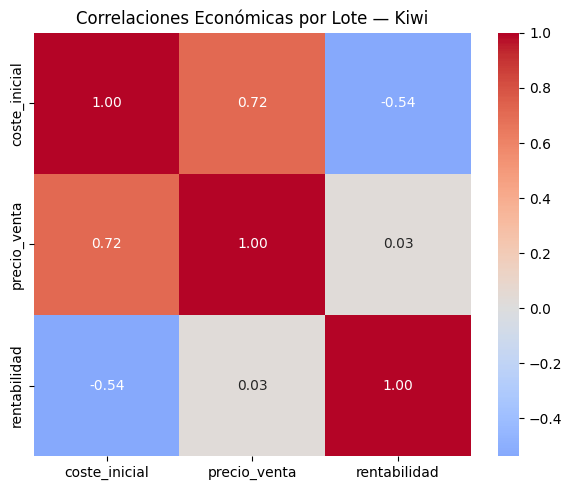

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlaciones Económicas por Lote — Kiwi')
plt.tight_layout()
plt.show()

               precio_venta  coste_inicial      peso
precio_venta       1.000000       0.715312 -0.007001
coste_inicial      0.715312       1.000000 -0.002092
peso              -0.007001      -0.002092  1.000000


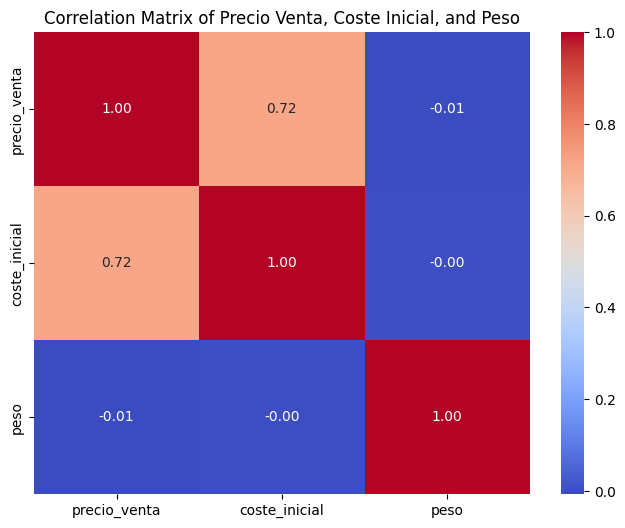

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['precio_venta', 'coste_inicial', 'peso']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Precio Venta, Coste Inicial, and Peso')
plt.show()

Las correlaciones entre coste inicial y precio venta son de 0.72 mientras que no encontramos correlación entre precio venta y peso ni entre coste inicial y peso. Creemos que esto debería estar totalmente relacionado ya que a mayor peso deberia tener un coste o precio mayor. Esto refuerza la teoria que exponemos de que los pesos no son correctos.

Aqui dejamos el analisis de las manzanas y pasamos a analizar la siguiente fruta.